In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data2.csv')

In [4]:
df.head()

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,0,08-AUG-17,07-AUG-18,08,1202,519755.22,5097.83,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
1,0,08-AUG-16,07-AUG-17,08,1202,519755.22,6556.52,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
2,0,08-AUG-15,07-AUG-16,08,1202,519755.22,6556.52,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
3,0,08-AUG-14,07-AUG-15,08,1202,519755.22,5102.83,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
4,0,08-AUG-17,07-AUG-18,08,1202,1400000.00,13304.87,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,NaN


In [5]:
df.isna().sum()

SEX                       0
INSR_BEGIN                0
INSR_END                  0
EFFECTIVE_YR              3
INSR_TYPE                 0
INSURED_VALUE             0
PREMIUM                  13
OBJECT_ID                 0
PROD_YEAR                63
SEATS_NUM                95
CARRYING_CAPACITY    116834
TYPE_VEHICLE              0
CCM_TON                   6
MAKE                      5
USAGE                     0
CLAIM_PAID           470727
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508499 entries, 0 to 508498
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SEX                508499 non-null  int64  
 1   INSR_BEGIN         508499 non-null  object 
 2   INSR_END           508499 non-null  object 
 3   EFFECTIVE_YR       508496 non-null  object 
 4   INSR_TYPE          508499 non-null  int64  
 5   INSURED_VALUE      508499 non-null  float64
 6   PREMIUM            508486 non-null  float64
 7   OBJECT_ID          508499 non-null  int64  
 8   PROD_YEAR          508436 non-null  float64
 9   SEATS_NUM          508404 non-null  float64
 10  CARRYING_CAPACITY  391665 non-null  float64
 11  TYPE_VEHICLE       508499 non-null  object 
 12  CCM_TON            508493 non-null  float64
 13  MAKE               508494 non-null  object 
 14  USAGE              508499 non-null  object 
 15  CLAIM_PAID         37772 non-null   float64
dtypes:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508499 entries, 0 to 508498
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SEX                508499 non-null  int64  
 1   INSR_BEGIN         508499 non-null  object 
 2   INSR_END           508499 non-null  object 
 3   EFFECTIVE_YR       508496 non-null  object 
 4   INSR_TYPE          508499 non-null  int64  
 5   INSURED_VALUE      508499 non-null  float64
 6   PREMIUM            508486 non-null  float64
 7   OBJECT_ID          508499 non-null  int64  
 8   PROD_YEAR          508436 non-null  float64
 9   SEATS_NUM          508404 non-null  float64
 10  CARRYING_CAPACITY  391665 non-null  float64
 11  TYPE_VEHICLE       508499 non-null  object 
 12  CCM_TON            508493 non-null  float64
 13  MAKE               508494 non-null  object 
 14  USAGE              508499 non-null  object 
 15  CLAIM_PAID         37772 non-null   float64
dtypes:

In [8]:
df.isna().sum()

SEX                       0
INSR_BEGIN                0
INSR_END                  0
EFFECTIVE_YR              3
INSR_TYPE                 0
INSURED_VALUE             0
PREMIUM                  13
OBJECT_ID                 0
PROD_YEAR                63
SEATS_NUM                95
CARRYING_CAPACITY    116834
TYPE_VEHICLE              0
CCM_TON                   6
MAKE                      5
USAGE                     0
CLAIM_PAID           470727
dtype: int64

In [9]:
def custom_describe(data):

    # Basic statistics
    desc_stats = data.describe()
 
    # Missing values count
    missing_values = data.isnull().sum()
 
    # Unique values count
    unique_values = data.nunique()
 
    # Identify numeric columns
    numeric_cols = data.select_dtypes(include=['number']).columns
 
    # Calculate IQR and identify outliers for each numeric column
    outliers = {}
    for col in numeric_cols:
        q1 = desc_stats.loc['25%', col]
        q3 = desc_stats.loc['75%', col]
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers[col] = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
 
    # Get data types for each column
    data_types = data.dtypes
   
    # Combine all information
    custom_description = pd.DataFrame({
        'data_type': data_types,
        'mean': desc_stats.loc['mean'],
        'std': desc_stats.loc['std'],
        'missing_values': missing_values,
        'unique_values': unique_values,
        'outliers': outliers
    })
    return custom_description

In [10]:
custom_describe(df)

,data_type,mean,std,missing_values,unique_values,outliers
CARRYING_CAPACITY,float64,4.165330e+02,3.206744e+03,116834,2249,83412.0
CCM_TON,float64,3.096946e+03,3.411725e+03,6,3264,30315.0
CLAIM_PAID,float64,2.430579e+05,1.081931e+06,470727,28350,5156.0
EFFECTIVE_YR,object,NaN,NaN,3,139,NaN
INSR_BEGIN,object,NaN,NaN,0,1461,NaN
INSR_END,object,NaN,NaN,0,1691,NaN
INSR_TYPE,int64,1.201758e+03,4.305089e-01,0,3,123464.0
INSURED_VALUE,float64,5.636926e+05,9.336250e+05,0,12084,29265.0
MAKE,object,NaN,NaN,5,746,NaN
OBJECT_ID,int64,5.000578e+09,3.579549e+05,0,223136,0.0


In [11]:
df.drop(columns=['CLAIM_PAID'], inplace=True)

In [12]:
df['EFFECTIVE_YR'].replace(np.nan,df['EFFECTIVE_YR'].mode,inplace=True)

In [13]:
df['MAKE'].replace(np.nan,df['MAKE'].mode,inplace=True)

In [14]:
x = df.loc[:,['PREMIUM','PROD_YEAR','SEATS_NUM','CARRYING_CAPACITY','CCM_TON']]

In [15]:
df['INSR_TYPE'].unique()

array([1202, 1201, 1204], dtype=int64)

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter = 10, random_state = 0)
# max_iter defines number of iterations done for imputing the values
df.loc[:,['PREMIUM','PROD_YEAR','SEATS_NUM','CARRYING_CAPACITY','CCM_TON']] =  pd.DataFrame(imp.fit_transform(x), columns = x.columns)      

In [17]:
df.isna().sum()

SEX                  0
INSR_BEGIN           0
INSR_END             0
EFFECTIVE_YR         0
INSR_TYPE            0
INSURED_VALUE        0
PREMIUM              0
OBJECT_ID            0
PROD_YEAR            0
SEATS_NUM            0
CARRYING_CAPACITY    0
TYPE_VEHICLE         0
CCM_TON              0
MAKE                 0
USAGE                0
dtype: int64

In [18]:
a = df.shape
df.drop_duplicates(inplace=True)
b = df.shape
print(b,a)

(508416, 15) (508499, 15)


In [19]:
value_counts = df['TYPE_VEHICLE'].value_counts(normalize=True)

other_categories = value_counts[value_counts < 0.02].index

# Replace those categories with 'other'
df['TYPE_VEHICLE'] = df['TYPE_VEHICLE'].apply(lambda x: 'other' if x in other_categories else x)
print(df['TYPE_VEHICLE'].unique())


['Pick-up' 'Truck' 'Bus' 'Trailers and semitrailers' 'Automobile'
 'Motor-cycle' 'Station Wagones' 'other']


In [20]:
value_counts = df['USAGE'].value_counts(normalize=True)

other_categories = value_counts[value_counts < 0.02].index

# Replace those categories with 'other'
df['USAGE'] = df['USAGE'].apply(lambda x: 'other' if x in other_categories else x)
print(df['USAGE'].unique())

['Own Goods' 'General Cartage' 'Fare Paying Passengers' 'Private'
 'Own service' 'Taxi' 'other']


In [21]:
value_counts = df['MAKE'].value_counts(normalize=True)

# Find categories with less than 2% occurrence
other_categories = value_counts[value_counts < 0.02].index

# Replace those categories with 'other'
df['MAKE'] = df['MAKE'].apply(lambda x: 'other' if x in other_categories else x)


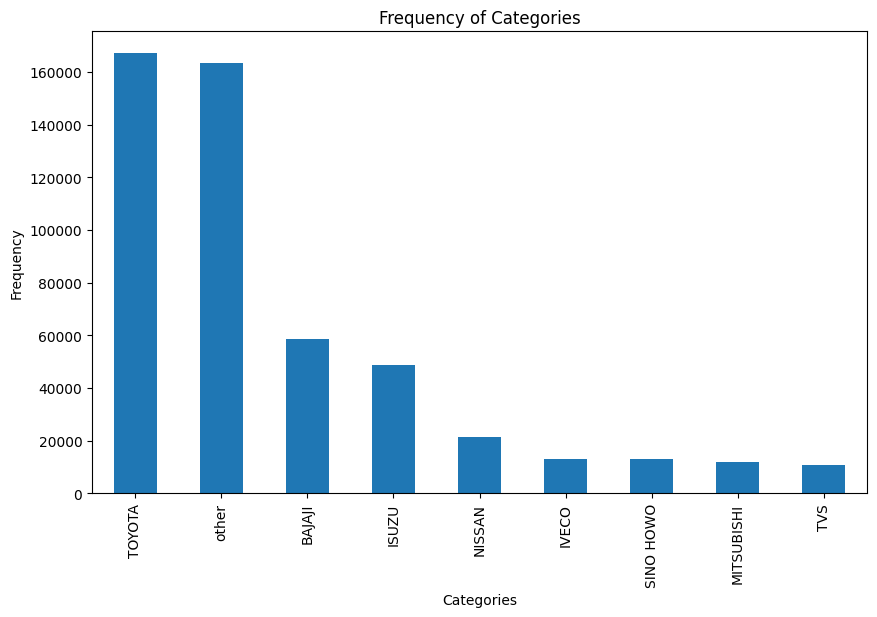

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'categorical_column' is the name of the column
plt.figure(figsize=(10, 6))
df['MAKE'].value_counts().plot(kind='bar')
plt.title('Frequency of Categories')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()


In [23]:
df['USAGE'].unique()

array(['Own Goods', 'General Cartage', 'Fare Paying Passengers',
       'Private', 'Own service', 'Taxi', 'other'], dtype=object)

In [24]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
X_new = ohe.fit_transform(df[['MAKE','USAGE','TYPE_VEHICLE']]).toarray()
newMat = pd.DataFrame(X_new,columns=ohe.get_feature_names_out(['MAKE','USAGE','TYPE_VEHICLE']))
newMat

,MAKE_ISUZU,MAKE_IVECO,MAKE_MITSUBISHI,MAKE_NISSAN,MAKE_SINO HOWO,MAKE_TOYOTA,MAKE_TVS,MAKE_other,USAGE_General Cartage,USAGE_Own Goods,...,USAGE_Private,USAGE_Taxi,USAGE_other,TYPE_VEHICLE_Bus,TYPE_VEHICLE_Motor-cycle,TYPE_VEHICLE_Pick-up,TYPE_VEHICLE_Station Wagones,TYPE_VEHICLE_Trailers and semitrailers,TYPE_VEHICLE_Truck,TYPE_VEHICLE_other
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508411,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
508412,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
508413,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
508414,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
df.drop(columns=['MAKE','USAGE','TYPE_VEHICLE'], inplace=True)
df = pd.concat([df,newMat], axis=1)

In [26]:
df.head()

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,...,USAGE_Private,USAGE_Taxi,USAGE_other,TYPE_VEHICLE_Bus,TYPE_VEHICLE_Motor-cycle,TYPE_VEHICLE_Pick-up,TYPE_VEHICLE_Station Wagones,TYPE_VEHICLE_Trailers and semitrailers,TYPE_VEHICLE_Truck,TYPE_VEHICLE_other
0,0.0,08-AUG-17,07-AUG-18,08,1202.0,519755.22,5097.83,5.000030e+09,2007.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,08-AUG-16,07-AUG-17,08,1202.0,519755.22,6556.52,5.000030e+09,2007.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,08-AUG-15,07-AUG-16,08,1202.0,519755.22,6556.52,5.000030e+09,2007.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,08-AUG-14,07-AUG-15,08,1202.0,519755.22,5102.83,5.000030e+09,2007.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,08-AUG-17,07-AUG-18,08,1202.0,1400000.00,13304.87,5.000030e+09,2010.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [27]:
numeric_column_names = df.select_dtypes(include=['number']).columns.tolist()

Correlation Matrix with heatmap:


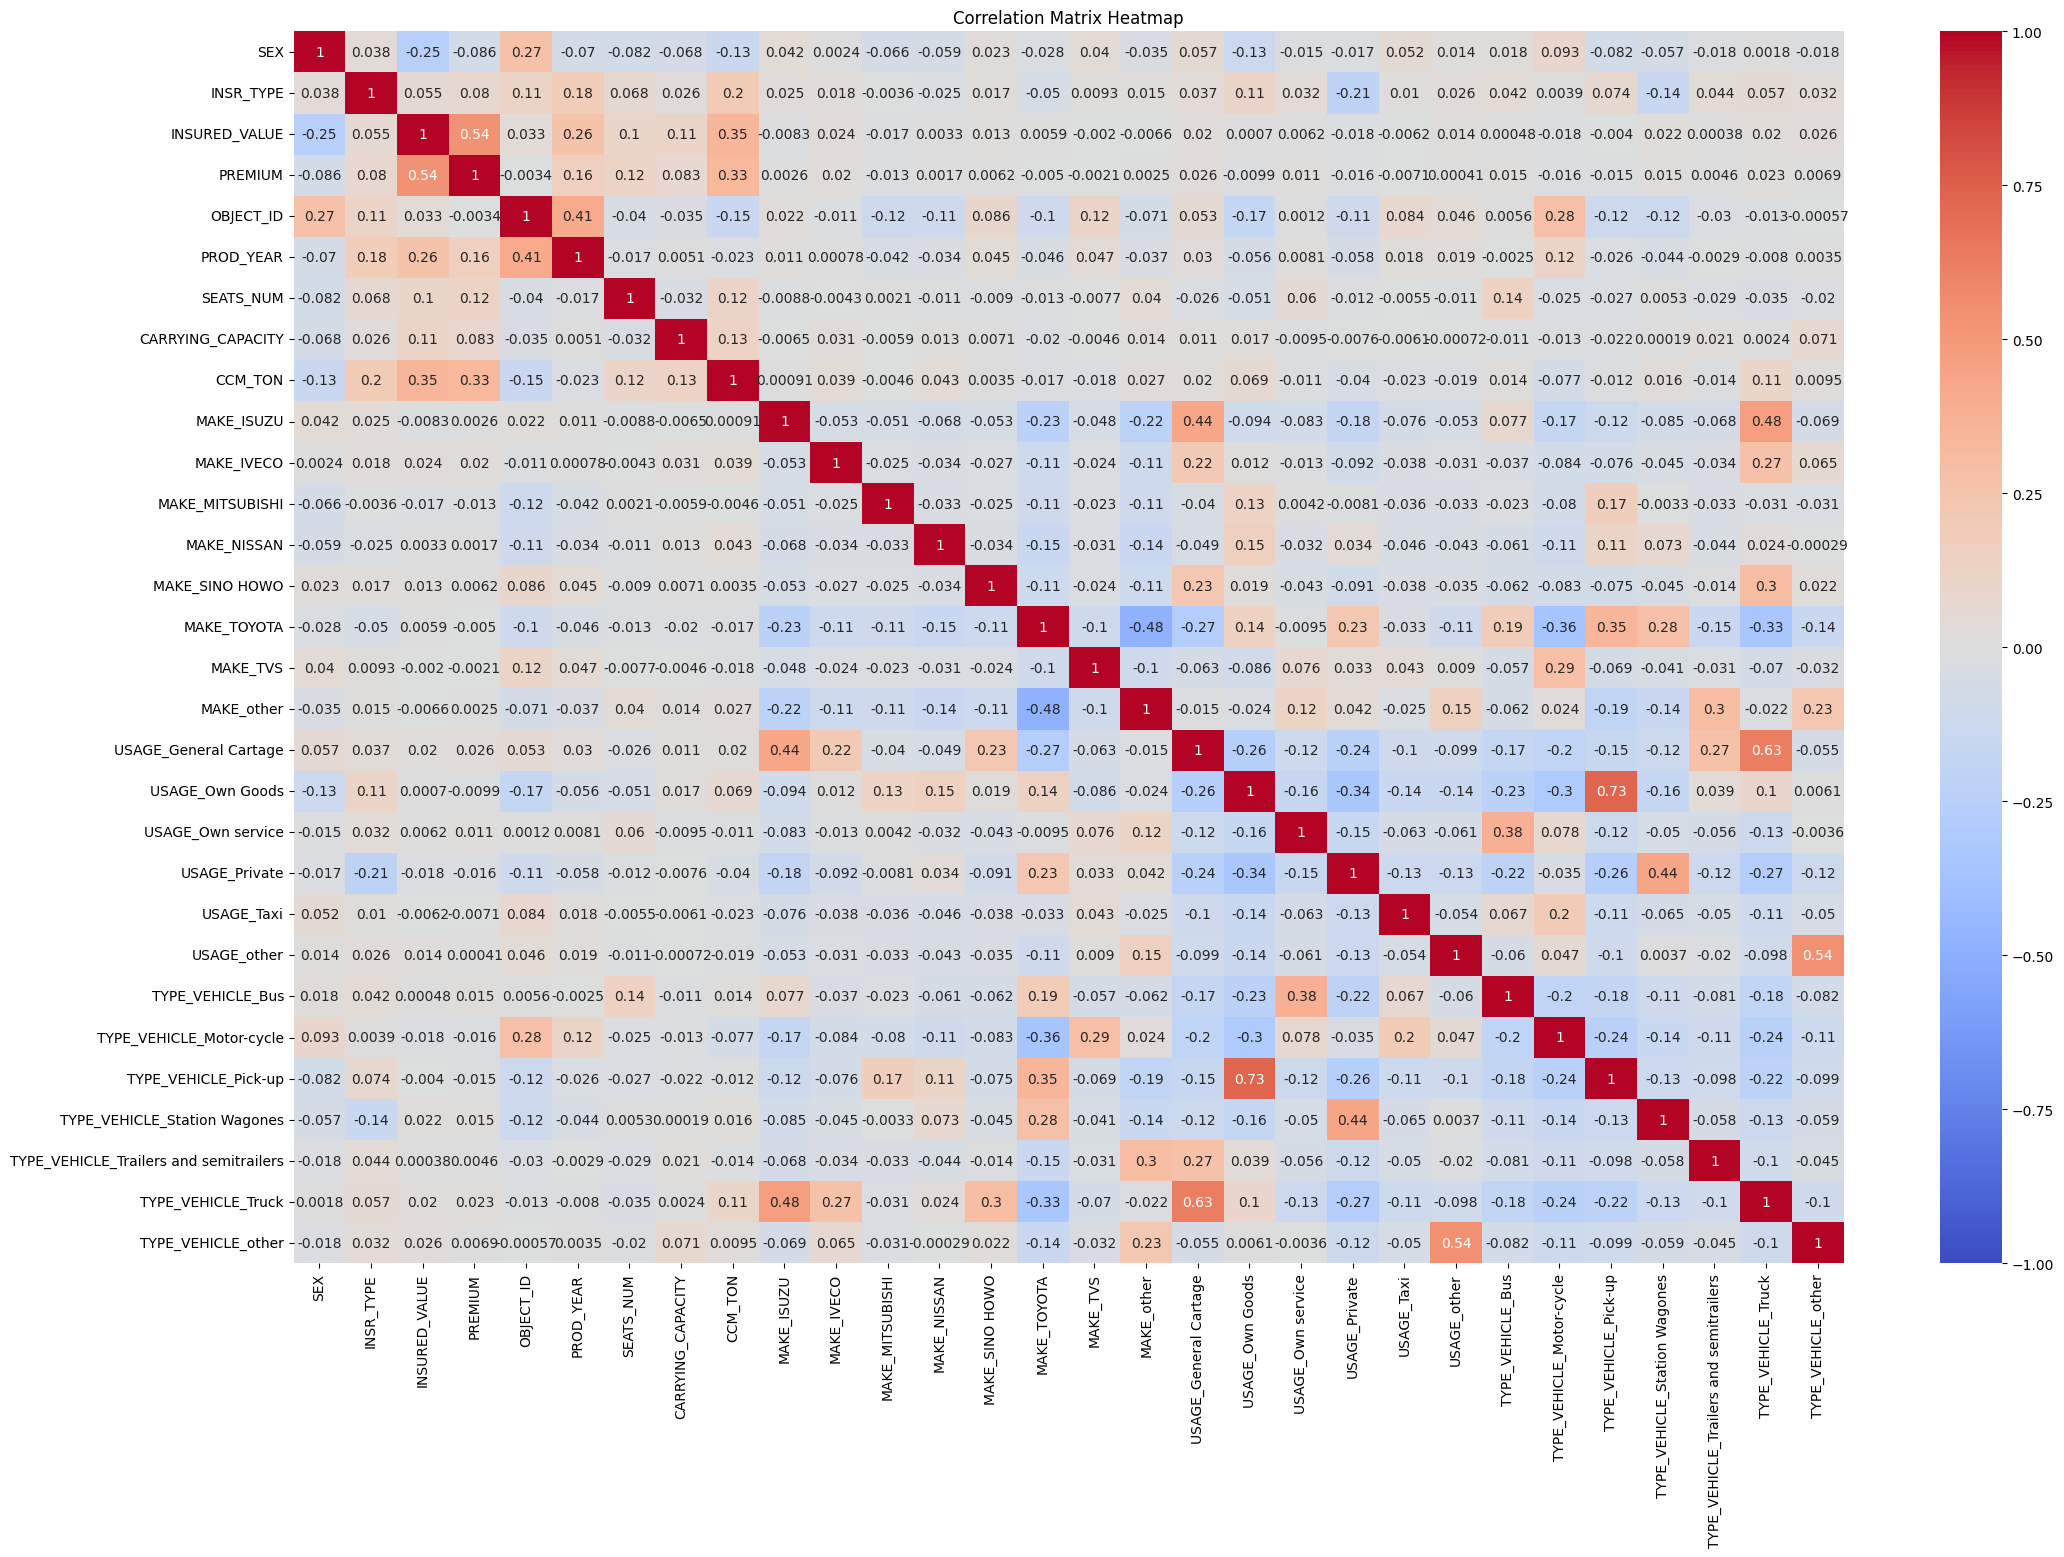

In [28]:
features = df.loc[:, numeric_column_names]

# Calculate the correlation matrix
correlation_matrix = features.corr()

# Display the correlation matrix
print("Correlation Matrix with heatmap:")

# Create a heatmap for better visualization
plt.figure(figsize=(25, 16))
sns.heatmap(correlation_matrix,  cmap="coolwarm", vmin=-1, vmax=1,annot = True)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df.loc[:,numeric_column_names] = sc.fit_transform(features)

In [30]:
df.head()

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,...,USAGE_Private,USAGE_Taxi,USAGE_other,TYPE_VEHICLE_Bus,TYPE_VEHICLE_Motor-cycle,TYPE_VEHICLE_Pick-up,TYPE_VEHICLE_Station Wagones,TYPE_VEHICLE_Trailers and semitrailers,TYPE_VEHICLE_Truck,TYPE_VEHICLE_other
0,-0.935029,08-AUG-17,07-AUG-18,08,0.561674,-0.047107,-0.183570,-1.531313,0.067288,-0.154366,...,-0.562512,-0.235829,-0.228656,-0.384799,-0.513072,2.154047,-0.275976,-0.210351,-0.47651,-0.213588
1,-0.935029,08-AUG-16,07-AUG-17,08,0.561674,-0.047107,-0.089521,-1.531313,0.067288,-0.154366,...,-0.562512,-0.235829,-0.228656,-0.384799,-0.513072,2.154047,-0.275976,-0.210351,-0.47651,-0.213588
2,-0.935029,08-AUG-15,07-AUG-16,08,0.561674,-0.047107,-0.089521,-1.531313,0.067288,-0.154366,...,-0.562512,-0.235829,-0.228656,-0.384799,-0.513072,2.154047,-0.275976,-0.210351,-0.47651,-0.213588
3,-0.935029,08-AUG-14,07-AUG-15,08,0.561674,-0.047107,-0.183247,-1.531313,0.067288,-0.154366,...,-0.562512,-0.235829,-0.228656,-0.384799,-0.513072,2.154047,-0.275976,-0.210351,-0.47651,-0.213588
4,-0.935029,08-AUG-17,07-AUG-18,08,0.561674,0.895700,0.345577,-1.531269,0.375538,-0.154366,...,-0.562512,-0.235829,-0.228656,-0.384799,-0.513072,2.154047,-0.275976,-0.210351,-0.47651,-0.213588


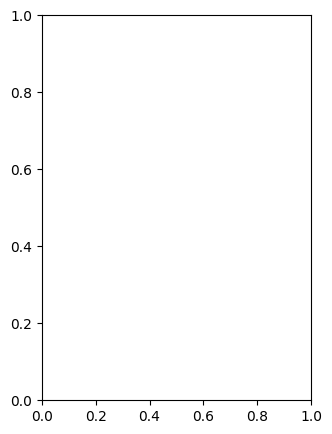

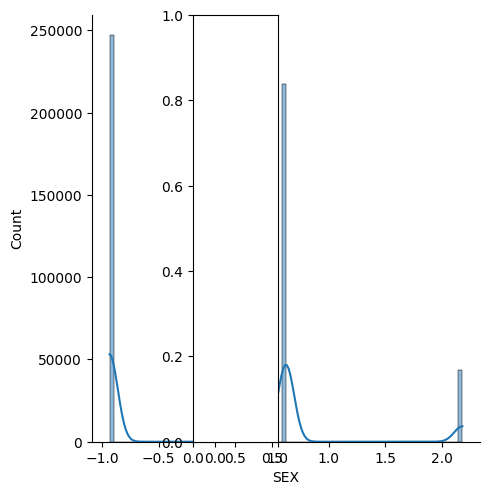

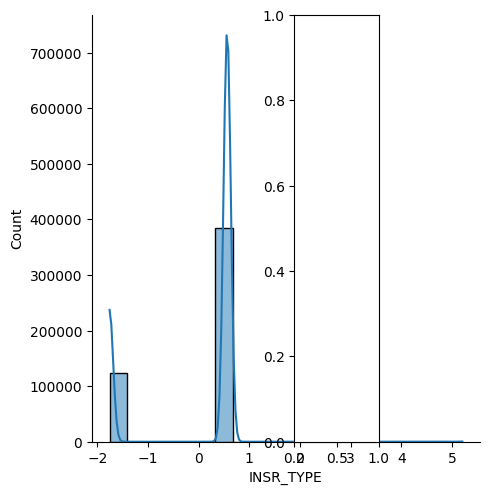

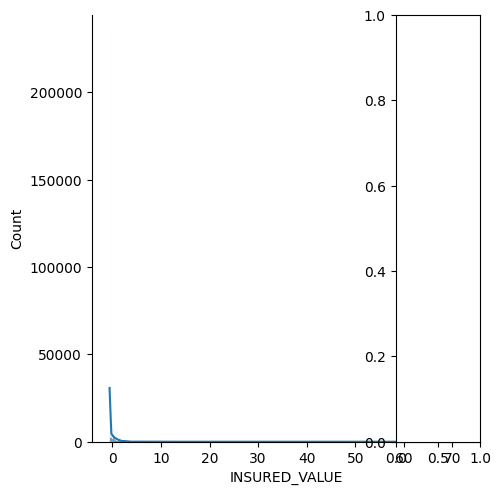

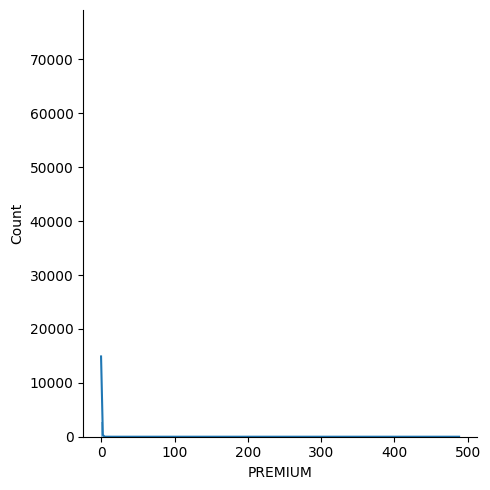

KeyboardInterrupt: 

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in range(0,(len(features.columns)-1),4):
    plt.figure(figsize=(16,5))
    plt.subplot(1,4,1)
    sns.displot(df[features.columns[i]],kde=True)

    plt.subplot(1,4,2)
    sns.displot(df[features.columns[i+1]],kde=True)
    plt.subplot(1,4,3)
    sns.displot(df[features.columns[i+2]],kde=True)

    plt.subplot(1,4,4)
    sns.displot(df[features.columns[i+3]],kde=True)
    plt.show()
    
